In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [12]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784

x = tf.placeholder('float', [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [13]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

In [14]:
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [15]:
encoder_op = encoder(x)
decoder_op = decoder(encoder_op)

y_pred = decoder_op
y_true = x
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [18]:
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)
for epoch in range(training_epochs):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict = {x: batch_xs})
    if epoch % display_step == 0:
        print('Epoch:', (epoch + 1), 'cost = ', x)
print('optimization complete')

Epoch: 1 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 2 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 3 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 4 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 5 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 6 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 7 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 8 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 9 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 10 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 11 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 12 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 13 cost =  Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Epoch: 14 cost =  Tensor("Placehol

In [19]:
encode_decode = sess.run(y_pred, feed_dict = {x: mnist.test.images[:examples_to_show]})

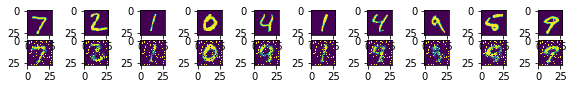

In [21]:
f, a = plt.subplots(2, 10, figsize = (10, 1))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))